### split - apply - combine explained

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/titanic.csv")

In [3]:
titanic_silce = titanic.iloc[:10, [2,3]]

In [4]:
titanic_silce

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [10]:
list(titanic_silce.groupby("sex"))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [11]:
list(titanic_silce.groupby("sex"))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [13]:
titanic_silce.groupby("sex").mean()

,age
sex,
female,28.00
male,28.25


In [16]:
titanic.groupby("sex").survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [15]:
titanic.groupby("sex")[["fare", "age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [17]:
new_df = titanic.groupby("sex").mean()

In [18]:
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


여성의 평균 생존률이 더 높고, 좌석 등급은 크게 차이나지 않지만 남성이 더 높다. 요금은 여성이 더 많이 지불했다.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

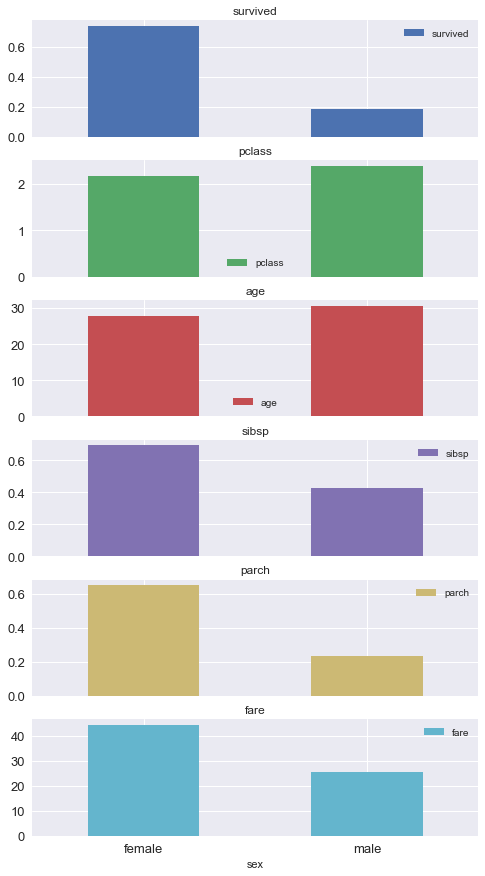

In [21]:
new_df.plot(kind = "bar", subplots = True, figsize = (8,15), fontsize = 13, rot = 0)
plt.show()

### split - apply - combine applied

#### summer Dateset

In [22]:
import pandas as pd

In [23]:
summer = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/summer.csv")

In [24]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [25]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [28]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n=20)
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

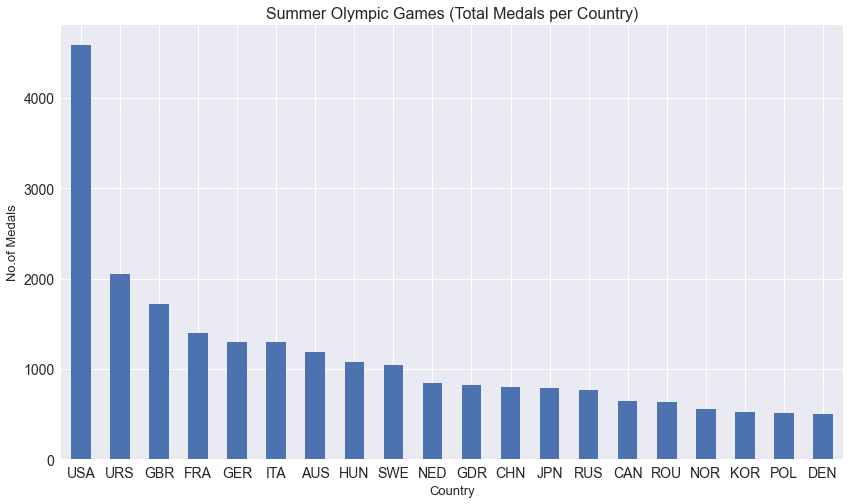

In [30]:
medals_per_country.plot(kind = "bar", figsize = (14,8), fontsize = 14, rot = 0)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("No.of Medals", fontsize = 13)
plt.title("Summer Olympic Games (Total Medals per Country)", fontsize = 16)
plt.show()

#### titanic Dateset

In [33]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic.fare.mean()

32.204207968574636

In [34]:
titanic.groupby("pclass").fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [36]:
titanic.survived.sum() # 342명이 생존했으며

342

In [37]:
titanic.survived.mean()# 38%의 승객만이 사고에서 살아남았음

0.3838383838383838

구명보트에는 여성과 아이가 먼저 탑승했음을 이미 알고 있으므로, 실제로 이 규칙이 지켜졌는지 확인할 수도 있다.

- 성별에 따른 생존율

In [40]:
# 전체 생존율은 38%에 불과하나, 여성 승객의 생존율은 높다.
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

- 등급별 생존율

In [41]:
# 등급이 높을 수록 상대적으로 높은 생존율을 보인다
titanic.groupby("pclass").survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

- 연령별 생존율   
연령에 대한 열을 만들어서 구하기

In [43]:
titanic["ad_chi"] = "adult"

In [46]:
titanic.loc[titanic.age < 18, "ad_chi"] = "child"

In [49]:
titanic.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [51]:
# 어릴수록 생존확률이 높다.
titanic.groupby("ad_chi").survived.mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [52]:
titanic.groupby(["sex", "ad_chi"]).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [53]:
# 여성의 생존율이 높고, 남성 성인의 생존율은 확실히 낮음
titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

In [54]:
w_and_c_first = titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

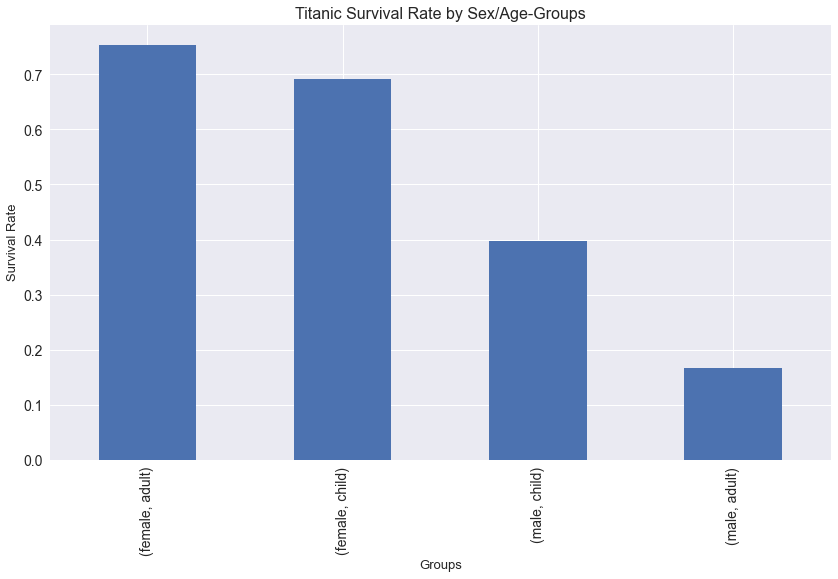

In [56]:
w_and_c_first.plot(kind = "bar", figsize =(14,8), fontsize = 14)
plt.xlabel("Groups", fontsize = 13)
plt.ylabel("Survival Rate", fontsize = 13)
plt.title("Titanic Survival Rate by Sex/Age-Groups", fontsize = 16)
plt.show()

### Advanced Aggregation with agg()

In [57]:
titanic = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/titanic.csv", usecols=["survived", "pclass", "sex", "age", "fare"])

In [58]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [59]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [60]:
titanic.groupby("sex").sum()

,survived,pclass,age,fare
sex,,,,
female,233,678,7286.00,13966.6628
male,109,1379,13919.17,14727.2865


In [63]:
# 필요한 집계결과를 한번에 보는데 칼럼별로 동일하게
titanic.groupby("sex").agg(["mean", "sum", "min", "max"])

survived                 pclass                      age            \
            mean  sum min max      mean   sum min max       mean       sum   
sex                                                                          
female  0.742038  233   0   1  2.159236   678   1   3  27.915709   7286.00   
male    0.188908  109   0   1  2.389948  1379   1   3  30.726645  13919.17   

                         fare                              
         min   max       mean         sum   min       max  
sex                                                        
female  0.75  63.0  44.479818  13966.6628  6.75  512.3292  
male    0.42  80.0  25.523893  14727.2865  0.00  512.3292

In [65]:
# 필요한 집계결과를 한번에 보는데 칼럼별로 다르게
titanic.groupby("sex").agg({"survived": ["sum", "mean"], "pclass": "mean", "age": ["mean", "median"], "fare":"max"})

survived              pclass        age             fare
            sum      mean      mean       mean median       max
sex                                                            
female      233  0.742038  2.159236  27.915709   27.0  512.3292
male        109  0.188908  2.389948  30.726645   29.0  512.3292

#### 재레이블링(열이름 변경)

In [66]:
titanic.groupby("sex").agg(survival_rate = ("survived", "mean"))

,survival_rate
sex,
female,0.742038
male,0.188908


In [67]:
titanic.groupby("sex").agg({"survived":["sum", "mean"], "age":["mean"]})

survived                  age
            sum      mean       mean
sex                                 
female      233  0.742038  27.915709
male        109  0.188908  30.726645

In [68]:
titanic.groupby("sex").agg(survival_total = ("survived", "sum"),survival_rate = ("survived", "mean"), mean_age = ("age", "mean") )

,survival_total,survival_rate,mean_age
sex,,,
female,233,0.742038,27.915709
male,109,0.188908,30.726645


In [69]:
titanic.groupby(["sex", "pclass"]).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [71]:
# 각 승객이 속한 그룹의 생존율 칼럼 생성
titanic["group_surv_rate"] = titanic.groupby(["sex", "pclass"]).survived.transform("mean")

In [72]:
titanic

,survived,pclass,sex,age,fare,group_surv_rate
0,0,3,male,22.0,7.2500,0.135447
1,1,1,female,38.0,71.2833,0.968085
2,1,3,female,26.0,7.9250,0.500000
3,1,1,female,35.0,53.1000,0.968085
4,0,3,male,35.0,8.0500,0.135447
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0.157407
887,1,1,female,19.0,30.0000,0.968085
888,0,3,female,NaN,23.4500,0.500000
889,1,1,male,26.0,30.0000,0.368852


In [75]:
# 생존여부 - 생존율
titanic["outliers"] = abs(titanic.survived - titanic.group_surv_rate)

In [76]:
#outliers의 값이 낮을수록 해당 승객이 속한 그룹의 생존율과 승객의 실제 생존율이 비슷해진다
# outliers 값이 높을수록 특이한 승객이라는 것
# 그룹의 생존율은 높은데 승객이 사망했거나 그 반대인 경우
titanic

,survived,pclass,sex,age,fare,group_surv_rate,outliers
0,0,3,male,22.0,7.2500,0.135447,0.135447
1,1,1,female,38.0,71.2833,0.968085,0.031915
2,1,3,female,26.0,7.9250,0.500000,0.500000
3,1,1,female,35.0,53.1000,0.968085,0.031915
4,0,3,male,35.0,8.0500,0.135447,0.135447
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0.157407,0.157407
887,1,1,female,19.0,30.0000,0.968085,0.031915
888,0,3,female,NaN,23.4500,0.500000,0.500000
889,1,1,male,26.0,30.0000,0.368852,0.631148


In [78]:
# 그룹의 생존율은 13%인데 살아남음. (남성 3등급 그룹의 생존율은 낮음)
titanic[titanic.outliers > 0.85]

,survived,pclass,sex,age,fare,group_surv_rate,outliers
36,1,3,male,NaN,7.2292,0.135447,0.864553
41,0,2,female,27.00,21.0000,0.921053,0.921053
65,1,3,male,NaN,15.2458,0.135447,0.864553
74,1,3,male,32.00,56.4958,0.135447,0.864553
81,1,3,male,29.00,9.5000,0.135447,0.864553
107,1,3,male,NaN,7.7750,0.135447,0.864553
125,1,3,male,12.00,11.2417,0.135447,0.864553
127,1,3,male,24.00,7.1417,0.135447,0.864553
146,1,3,male,27.00,7.7958,0.135447,0.864553
165,1,3,male,9.00,20.5250,0.135447,0.864553


### Replacing NA values by groupby-specific values

In [79]:
mean_age = titanic.age.mean()
mean_age

29.69911764705882

In [80]:
titanic.age.fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [82]:
titanic.age.fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [83]:
titanic.groupby(["sex", "pclass"]).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [84]:
titanic["group_mean_age"] = titanic.groupby(["sex", "pclass"]).age.transform("mean")

In [85]:
titanic.head(20)

,survived,pclass,sex,age,fare,group_surv_rate,outliers,group_mean_age
0,0,3,male,22.0,7.2500,0.135447,0.135447,26.507589
1,1,1,female,38.0,71.2833,0.968085,0.031915,34.611765
2,1,3,female,26.0,7.9250,0.500000,0.500000,21.750000
3,1,1,female,35.0,53.1000,0.968085,0.031915,34.611765
4,0,3,male,35.0,8.0500,0.135447,0.135447,26.507589
5,0,3,male,NaN,8.4583,0.135447,0.135447,26.507589
6,0,1,male,54.0,51.8625,0.368852,0.368852,41.281386
7,0,3,male,2.0,21.0750,0.135447,0.135447,26.507589
8,1,3,female,27.0,11.1333,0.500000,0.500000,21.750000
9,1,2,female,14.0,30.0708,0.921053,0.078947,28.722973


In [86]:
titanic.age.fillna(titanic.group_mean_age, inplace=True)

In [87]:
titanic

,survived,pclass,sex,age,fare,group_surv_rate,outliers,group_mean_age
0,0,3,male,22.00,7.2500,0.135447,0.135447,26.507589
1,1,1,female,38.00,71.2833,0.968085,0.031915,34.611765
2,1,3,female,26.00,7.9250,0.500000,0.500000,21.750000
3,1,1,female,35.00,53.1000,0.968085,0.031915,34.611765
4,0,3,male,35.00,8.0500,0.135447,0.135447,26.507589
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,13.0000,0.157407,0.157407,30.740707
887,1,1,female,19.00,30.0000,0.968085,0.031915,34.611765
888,0,3,female,21.75,23.4500,0.500000,0.500000,21.750000
889,1,1,male,26.00,30.0000,0.368852,0.631148,41.281386


In [88]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         891 non-null    int64  
 1   pclass           891 non-null    int64  
 2   sex              891 non-null    object 
 3   age              891 non-null    float64
 4   fare             891 non-null    float64
 5   group_surv_rate  891 non-null    float64
 6   outliers         891 non-null    float64
 7   group_mean_age   891 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 55.8+ KB


#### Generalizing split-apply-combine with apply() - 직접 함수를 정의해서 사용하기

In [95]:
import pandas as pd

In [96]:
titanic = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/titanic.csv", usecols=["survived", "pclass", "sex", "age", "fare"])

In [97]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [98]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [99]:
female_group = list(titanic.groupby("sex"))[0][1]
female_group

,survived,pclass,sex,age,fare
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708
...,...,...,...,...,...
880,1,2,female,25.0,26.0000
882,0,3,female,22.0,10.5167
885,0,3,female,39.0,29.1250
887,1,1,female,19.0,30.0000


In [100]:
female_group.mean()

C:\Users\skygg\AppData\Local\Temp\ipykernel_19340\92614746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  female_group.mean()


survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [101]:
def group_mean(group):
    return group.mean()

In [102]:
group_mean(female_group)

C:\Users\skygg\AppData\Local\Temp\ipykernel_19340\359042690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return group.mean()


survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [103]:
titanic.groupby("sex").apply(group_mean)

C:\Users\skygg\AppData\Local\Temp\ipykernel_19340\359042690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return group.mean()


,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [104]:
titanic.nlargest(5, "age")

,survived,pclass,sex,age,fare
630,1,1,male,80.0,30.0000
851,0,3,male,74.0,7.7750
96,0,1,male,71.0,34.6542
493,0,1,male,71.0,49.5042
116,0,3,male,70.5,7.7500


In [107]:
def five_oldest_surv(group):
    return group[group.survived == 1].nlargest(5, "age")

In [108]:
titanic.groupby("sex").apply(five_oldest_surv)

survived  pclass     sex   age     fare
sex                                                
female 275         1       1  female  63.0  77.9583
       483         1       3  female  63.0   9.5875
       829         1       1  female  62.0  80.0000
       366         1       1  female  60.0  75.2500
       11          1       1  female  58.0  26.5500
male   630         1       1    male  80.0  30.0000
       570         1       2    male  62.0  10.5000
       587         1       1    male  60.0  79.2000
       647         1       1    male  56.0  35.5000
       449         1       1    male  52.0  30.5000

#### 계층 인덱스

In [109]:
titanic = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/titanic.csv", usecols=["survived", "pclass", "sex", "age", "fare"])

In [110]:
titanic

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [111]:
summary = titanic.groupby(["sex", "pclass"]).mean()

In [112]:
summary

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

In [114]:
summary.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [116]:
summary.loc[("female",2), :]

survived     0.921053
age         28.722973
fare        21.970121
Name: (female, 2), dtype: float64

In [115]:
summary.loc[("female",2), "age"]

28.722972972972972

In [118]:
summary.swaplevel().sort_index()

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [120]:
summary.reset_index()

,sex,pclass,survived,age,fare
0,female,1,0.968085,34.611765,106.125798
1,female,2,0.921053,28.722973,21.970121
2,female,3,0.500000,21.750000,16.118810
3,male,1,0.368852,41.281386,67.226127
4,male,2,0.157407,30.740707,19.741782
5,male,3,0.135447,26.507589,12.661633


#### stack() and unstack()

In [122]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [123]:
medals_by_country = summer.groupby(["Country", "Medal"]).Medal.count()

In [124]:
medals_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [126]:
medals_by_country.loc[("USA", "Gold")]

2235

In [127]:
medals_by_country.shape

(347,)

In [129]:
medals_by_country.unstack()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


인덱스 레벨은 가장 우측부터 시작. 가장 우측이 -1

In [135]:
medals_by_country = medals_by_country.unstack(level = -1, fill_value=0)

In [136]:
medals_by_country.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99


In [137]:
medals_by_country.shape

(147, 3)

In [139]:
medals_by_country = medals_by_country[["Gold", "Silver", "Bronze"]]

In [147]:
# 골드 - 내림차순, 실버- 내림차순, 브론즈 - 내림차순
medals_by_country.sort_values(by=["Gold", "Silver", "Bronze"], ascending = [False, False, False], inplace=True)

In [148]:
medals_by_country.head(10)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [145]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

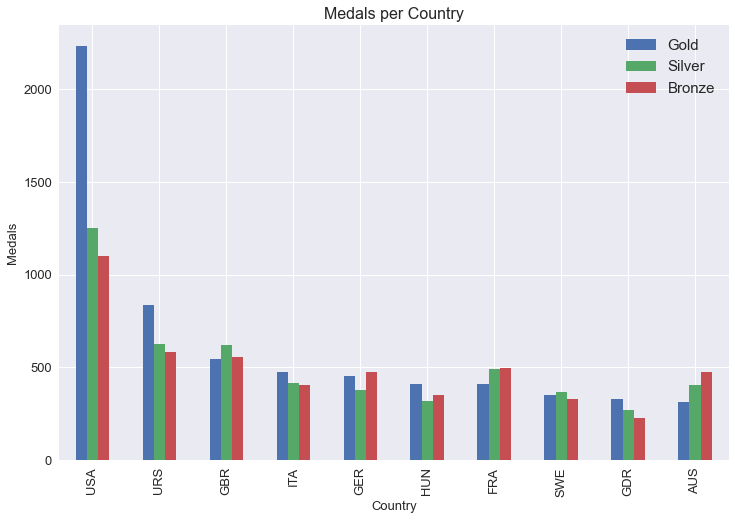

In [150]:
medals_by_country.head(10).plot(kind = "bar", figsize = (12,8), fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("Medals", fontsize = 13)
plt.title("Medals per Country", fontsize = 16)
plt.legend(fontsize = 15)
plt.show()

In [153]:
medals_by_country.stack().unstack()
#stack()을 통해 내부 열로 돌려놓을 수 있음, 

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1
